In [157]:
## importing necessary liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
## reading the dataset
df = pd.read_csv(r"C:\Users\bobby\Downloads\Bengaluru_House_Data.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [6]:
df.shape

(13320, 9)

__Observation:__

- The dataset has 13320 rows and 9 columns

In [7]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

### Basic Information about datset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


__Observation:__
    
- The total 13320 entries in the dataset
- The dataset has 9 columns in it
- Out of which 6 columns are object datatype and 3 colums are           float datatype
- The columns like location, size, society, bath and balcony have       some missing values in it

### Statistical summary (5 point summary)

In [9]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


## Check for the null values

In [10]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
df.isna().sum()/len(df)*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

__Observations:__

- Around 41%  of the values are missing in society column of the dataset
- Balcony column is having 4% missing values, While the other have less than 1% missing values in it

### Treating the null values

In [12]:
for i in df.columns:
    print(i, df[i].unique(),df[i].dtypes)
    print("---------------------------")

area_type ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area'] object
---------------------------
availability ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul'] object
---------------------------
location ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 

In [13]:
for i in df.columns:
    print(i, df[i].nunique(),df[i].dtypes)
    print("---------------------------")

area_type 4 object
---------------------------
availability 81 object
---------------------------
location 1305 object
---------------------------
size 31 object
---------------------------
society 2688 object
---------------------------
total_sqft 2117 object
---------------------------
bath 19 float64
---------------------------
balcony 4 float64
---------------------------
price 1994 float64
---------------------------


In [14]:
df["bath"].value_counts() ## We can consider this as categorical columns as the unique values are very less

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [15]:
df["balcony"].value_counts() ## We can consider this as categorical columns as the unique values are very less

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

### Society

In [16]:
df["society"].isna().sum()/len(df)*100

41.306306306306304

In [17]:
df.drop("society", axis= 1, inplace= True) ## dropping the whole Column as the missing values are more than 30%

In [18]:
df.isna().sum()/len(df)*100

area_type       0.000000
availability    0.000000
location        0.007508
size            0.120120
total_sqft      0.000000
bath            0.548048
balcony         4.572072
price           0.000000
dtype: float64

In [19]:
df1 = df.copy() ## making the copy of dataset

In [20]:
df.dropna()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [21]:
13320 - 12710


610

In [22]:
(610/13320)*100


4.57957957957958

In [23]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [24]:
for i in df.columns:
    print(i, df[i].dtypes)

area_type object
availability object
location object
size object
total_sqft object
bath float64
balcony float64
price float64


### Location

In [25]:
df["location"].dtype ## here the location is having object datatype so we will impute it with mode

dtype('O')

In [26]:
x = df["location"].mode()
x[0]

'Whitefield'

In [27]:
df["location"].fillna(df["location"].mode()[0], inplace= True)

In [28]:
df.isna().sum()/len(df)*100

area_type       0.000000
availability    0.000000
location        0.000000
size            0.120120
total_sqft      0.000000
bath            0.548048
balcony         4.572072
price           0.000000
dtype: float64

### Size

In [29]:
df["size"].dtype ## here the location is having object datatype so we will impute it with mode

dtype('O')

In [30]:
x = df["size"].mode()
x[0]

'2 BHK'

In [31]:
df["size"].fillna(df["size"].mode()[0], inplace= True)

In [32]:
df.isna().sum()/len(df)*100

area_type       0.000000
availability    0.000000
location        0.000000
size            0.000000
total_sqft      0.000000
bath            0.548048
balcony         4.572072
price           0.000000
dtype: float64

### Bath

In [33]:
df["bath"].dtype ## here the location is having object datatype so we will impute it with mode

dtype('float64')

In [34]:
df["bath"].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [35]:
x = df["bath"].mode()
x[0]

2.0

In [36]:
df["bath"].fillna(df["bath"].mode()[0], inplace= True)

In [37]:
df.isna().sum()/len(df)*100

area_type       0.000000
availability    0.000000
location        0.000000
size            0.000000
total_sqft      0.000000
bath            0.000000
balcony         4.572072
price           0.000000
dtype: float64

### Balcony

In [38]:
df["balcony"].dtype ## here the location is having object datatype so we will impute it with mode

dtype('float64')

In [39]:
df["balcony"].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [40]:
x = df["balcony"].mode()
x[0]

2.0

In [41]:
df["balcony"].fillna(df["balcony"].mode()[0], inplace= True)

In [42]:
df.isna().sum()/len(df)*100

area_type       0.0
availability    0.0
location        0.0
size            0.0
total_sqft      0.0
bath            0.0
balcony         0.0
price           0.0
dtype: float64

__Observation:__

- we have successfully removed all the null values from the dataset

### Checking for the duplicates

In [43]:
df.duplicated().sum()

569

In [44]:
df[df.duplicated()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,1194,2.0,2.0,47.0
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,1027,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,1353,2.0,2.0,110.0
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,1500,9.0,2.0,250.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,1345,2.0,1.0,57.0


__Observation:__

- There are 569 duplicated rows in the dataset 

### Dropping the Duplicates

In [45]:
df.drop_duplicates(inplace = True)

In [46]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [47]:
df.shape

(12751, 8)

__Observation:__

- we have successfully removed all the duplicated values

### Outlier's Detection

- outliers are the values which are different from the dataset

### Price

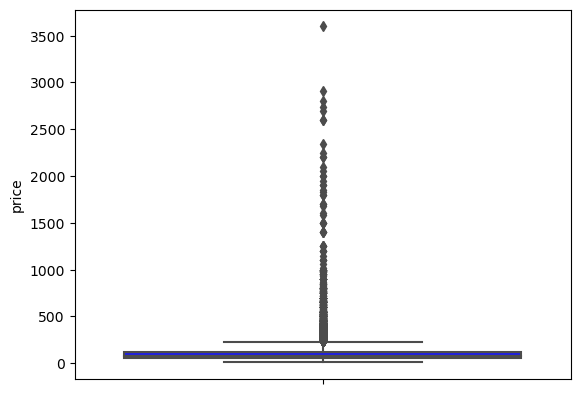

In [48]:
sns.boxplot(y = "price", data = df, color="blue")
plt.show()

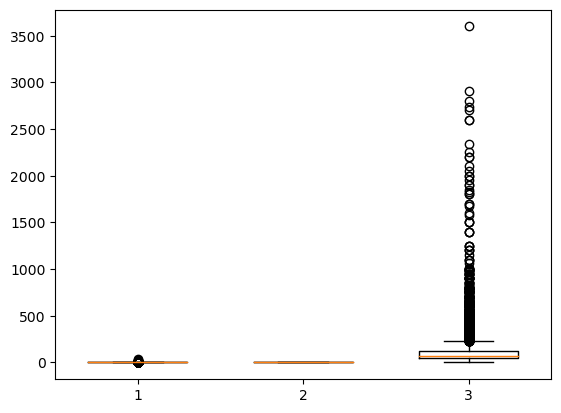

In [49]:
fig , ax = plt.subplots()

ax.boxplot(df["bath"], positions= [1], widths= 0.6)

ax.boxplot(df["balcony"], positions= [2], widths= 0.6)

ax.boxplot(df["price"], positions= [3], widths= 0.6)

plt.show()

In [50]:
df["price"].describe()

count    12751.000000
mean       114.492961
std        151.676492
min          8.000000
25%         50.000000
50%         73.000000
75%        122.000000
max       3600.000000
Name: price, dtype: float64

In [51]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


### Total_sqft

In [52]:
df["total_sqft"].dtype

dtype('O')

In [53]:
df["total_sqft"].nunique()

2117

In [56]:
for i in df["total_sqft"].unique():
    print(i)

1056
2600
1440
1521
1200
1170
2732
3300
1310
1020
1800
2785
1000
1100
2250
1175
1180
1540
2770
600
1755
2800
1767
510
1250
660
1610
1151
1025
2100 - 2850
1075
1760
1693
1925
700
1070
1724
1290
1143
1296
1254
1330.74
970
1459
800
869
1270
1670
2010
1185
1600
3010 - 3410
1500
1407
840
4395
845
5700
1160
3000
1140
1220
1350
1005
500
1358
1569
1240
2089
1206
1150
2511
460
4400
1660
2957 - 3450
1326
1325
1499
1665
708
1060
710
1450
2894
1330
2502
650
2400
1007
966
1630
1640
782
1260
1413
1116
1530
3700
2497
1436
276
1427
2061
3067 - 8156
2650
1282
1050
945
950
1870
880
1535
1360
1042 - 1105
1280
5000
3050
1563.05
1167
4000
1828
890
1612
1034
1710
957
2795
1125
1735
2050
3750
1063
1904
4200
2000
1145 - 1340
1425
1470
1300
450
1152
1550
400
705
770
1242
1700
2144
1704
1846
1340
1015 - 1540
1327
1186
1783
1400
980
1285
912
1225
1909
1359
1207
1736
2850
1595
1798
1475
1580
1295
3600
589
1415
1787
984
1520 - 1740
2405
1080
1900
805
1153
1148
1110
1933
3500
645
1644
910
1577
4050
2420
900
1108
30

In [58]:
## i want  to find index of all those values which are showing a range

ind = df[df.total_sqft.str.contains("-")].index


In [59]:
ind

Index([   30,    56,    81,   122,   137,   165,   188,   224,   549,   579,
       ...
       12435, 12544, 12791, 12861, 12955, 12975, 12990, 13059, 13240, 13265],
      dtype='int64', length=200)

In [60]:
df.loc[ind, "total_sqft"]

30       2100 - 2850
56       3010 - 3410
81       2957 - 3450
122      3067 - 8156
137      1042 - 1105
            ...     
12975     850 - 1060
12990    1804 - 2273
13059    1200 - 1470
13240    1020 - 1130
13265    1133 - 1384
Name: total_sqft, Length: 200, dtype: object

In [65]:
## we are going to change these range values with mean of of lowerbound and upper bound

In [66]:
s = df[df.total_sqft.str.contains("-")]["total_sqft"].str.split("-")

In [67]:
s

30       [2100 ,  2850]
56       [3010 ,  3410]
81       [2957 ,  3450]
122      [3067 ,  8156]
137      [1042 ,  1105]
              ...      
12975     [850 ,  1060]
12990    [1804 ,  2273]
13059    [1200 ,  1470]
13240    [1020 ,  1130]
13265    [1133 ,  1384]
Name: total_sqft, Length: 200, dtype: object

In [68]:
lsc = []

for i in s:
    a = (float(i[0])+float(i[1]))/2
    lsc.append(a)
    
print(lsc)

[2475.0, 3210.0, 3203.5, 5611.5, 1073.5, 1242.5, 1277.5, 1630.0, 1317.5, 1800.0, 1132.5, 5520.0, 4046.0, 5600.0, 1177.5, 4624.5, 1122.5, 582.5, 1142.5, 4348.5, 657.5, 649.5, 1450.0, 1000.0, 971.5, 1662.0, 687.325, 615.0, 3430.0, 2038.5, 3715.0, 665.0, 4624.5, 776.5, 2817.5, 3817.0, 3461.0, 1277.5, 825.0, 1128.76, 3715.0, 1104.0, 790.5, 3035.0, 3181.0, 3539.5, 2856.0, 700.0, 1559.0, 1352.5, 1800.0, 1950.0, 1185.5, 1005.0, 1707.0, 1476.0, 3181.0, 1192.5, 2912.5, 630.5, 1530.0, 717.0, 1664.0, 3185.0, 4303.5, 1343.5, 3416.5, 1312.5, 1137.5, 458.0, 2345.0, 709.0, 605.0, 2094.0, 2987.5, 2072.5, 1089.0, 1625.0, 2661.0, 680.0, 412.5, 3752.5, 805.5, 709.0, 1462.5, 1891.0, 1617.5, 1302.5, 975.0, 2585.5, 630.5, 2648.0, 614.5, 4334.0, 2336.5, 1302.5, 3317.5, 1405.0, 1532.5, 3550.0, 2856.0, 2856.0, 1583.0, 1115.0, 1162.5, 1580.0, 1272.5, 925.0, 2856.0, 698.5, 1730.0, 1431.5, 4062.5, 1029.5, 2195.0, 1495.0, 778.0, 1155.0, 3496.5, 1700.0, 1522.5, 784.0, 3385.5, 777.0, 2464.5, 640.0, 1773.5, 3854.5, 3

In [69]:
## replacing the range with the mean of it

df.loc[ind, "total_sqft"] = lsc

In [70]:
df.loc[ind]

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2475.0,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3210.0,2.0,2.0,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,3203.5,2.0,2.0,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,5611.5,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1073.5,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,955.0,2.0,0.0,38.190
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,2038.5,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,1335.0,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,1075.0,2.0,2.0,52.570


In [74]:
for i in df["total_sqft"].unique():
    print(i)
    

1056
2600
1440
1521
1200
1170
2732
3300
1310
1020
1800
2785
1000
1100
2250
1175
1180
1540
2770
600
1755
2800
1767
510
1250
660
1610
1151
1025
2475.0
1075
1760
1693
1925
700
1070
1724
1290
1143
1296
1254
1330.74
970
1459
800
869
1270
1670
2010
1185
1600
3210.0
1500
1407
840
4395
845
5700
1160
3000
1140
1220
1350
1005
500
1358
1569
1240
2089
1206
1150
2511
460
4400
1660
3203.5
1326
1325
1499
1665
708
1060
710
1450
2894
1330
2502
650
2400
1007
966
1630
1640
782
1260
1413
1116
1530
3700
2497
1436
276
1427
2061
5611.5
2650
1282
1050
945
950
1870
880
1535
1360
1073.5
1280
5000
3050
1563.05
1167
4000
1828
890
1612
1034
1710
957
2795
1125
1735
2050
3750
1063
1904
4200
2000
1242.5
1425
1470
1300
450
1152
1550
400
705
770
1242
1700
2144
1704
1846
1340
1277.5
1327
1186
1783
1400
980
1285
912
1225
1909
1359
1207
1736
2850
1595
1798
1475
1580
1295
3600
589
1415
1787
984
1630.0
2405
1080
1900
805
1153
1148
1110
1933
3500
645
1644
910
1577
4050
2420
900
1108
3045
2900
1162
1035
1464
1866
1804
913
186

In [75]:
## there are still values with metrs and yards we are going to treat them

In [76]:
df.total_sqft.replace("[A-Za-z.]","",regex= True, inplace=True)

In [77]:
for i in df["total_sqft"].unique():
    print(i)
    

1056
2600
1440
1521
1200
1170
2732
3300
1310
1020
1800
2785
1000
1100
2250
1175
1180
1540
2770
600
1755
2800
1767
510
1250
660
1610
1151
1025
2475.0
1075
1760
1693
1925
700
1070
1724
1290
1143
1296
1254
133074
970
1459
800
869
1270
1670
2010
1185
1600
3210.0
1500
1407
840
4395
845
5700
1160
3000
1140
1220
1350
1005
500
1358
1569
1240
2089
1206
1150
2511
460
4400
1660
3203.5
1326
1325
1499
1665
708
1060
710
1450
2894
1330
2502
650
2400
1007
966
1630
1640
782
1260
1413
1116
1530
3700
2497
1436
276
1427
2061
5611.5
2650
1282
1050
945
950
1870
880
1535
1360
1073.5
1280
5000
3050
156305
1167
4000
1828
890
1612
1034
1710
957
2795
1125
1735
2050
3750
1063
1904
4200
2000
1242.5
1425
1470
1300
450
1152
1550
400
705
770
1242
1700
2144
1704
1846
1340
1277.5
1327
1186
1783
1400
980
1285
912
1225
1909
1359
1207
1736
2850
1595
1798
1475
1580
1295
3600
589
1415
1787
984
1630.0
2405
1080
1900
805
1153
1148
1110
1933
3500
645
1644
910
1577
4050
2420
900
1108
3045
2900
1162
1035
1464
1866
1804
913
1868


In [78]:
## converting it into float data type

In [79]:
df.total_sqft = df.total_sqft.astype(float)

In [80]:
df.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

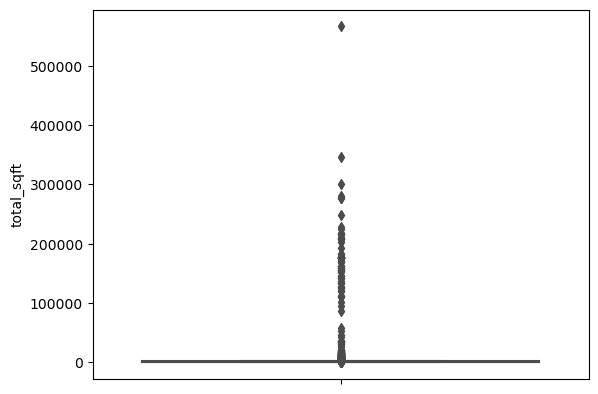

In [85]:
sns.boxplot(y = "total_sqft", data = df, color="blue")
plt.show()

### Outlier Treatment

In [86]:
## we are going to cap the values between the upper bound and lower bound

In [87]:
def outlier(data):
    
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*(iqr)
    upper_bound = q3 + 1.5*(iqr)
    
    return data.clip(upper_bound,lower_bound)

In [89]:
df["total_sqft"].describe()

count     12751.000000
mean       2436.581412
std       13206.996703
min           1.000000
25%        1100.000000
50%        1285.000000
75%        1700.000000
max      566584.000000
Name: total_sqft, dtype: float64

In [90]:
df["Total"] = outlier(df.total_sqft)

In [92]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0


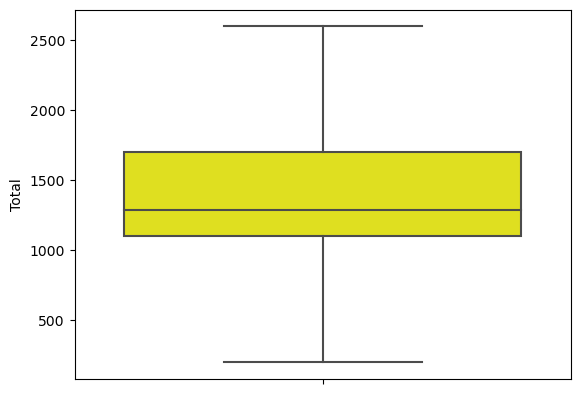

In [97]:
sns.boxplot(y = "Total", data = df, color="yellow")
plt.show()

In [98]:
df.shape

(12751, 9)

In [99]:
df["New_price"] = outlier(df.price)

In [101]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total,New_price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,2600.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0,51.00


In [103]:
df.shape

(12751, 10)

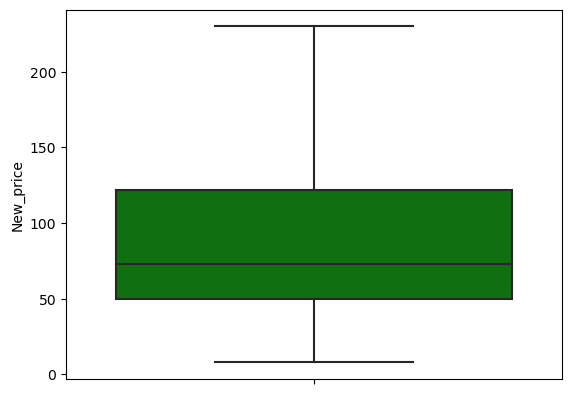

In [100]:
sns.boxplot(y = "New_price", data = df, color="green")
plt.show()

### Analysis

#### uni-variate

In [105]:
## will take individual column and analyse it
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total,New_price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,2600.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0,51.00


In [111]:
df["area_type"].value_counts()

area_type
Super built-up  Area    8279
Built-up  Area          2396
Plot  Area              1989
Carpet  Area              87
Name: count, dtype: int64

### Average price according to area type

C:\Users\bobby\AppData\Local\Temp\ipykernel_22880\16962403.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x  = "area_type", y = "price", data = df, ci = False)


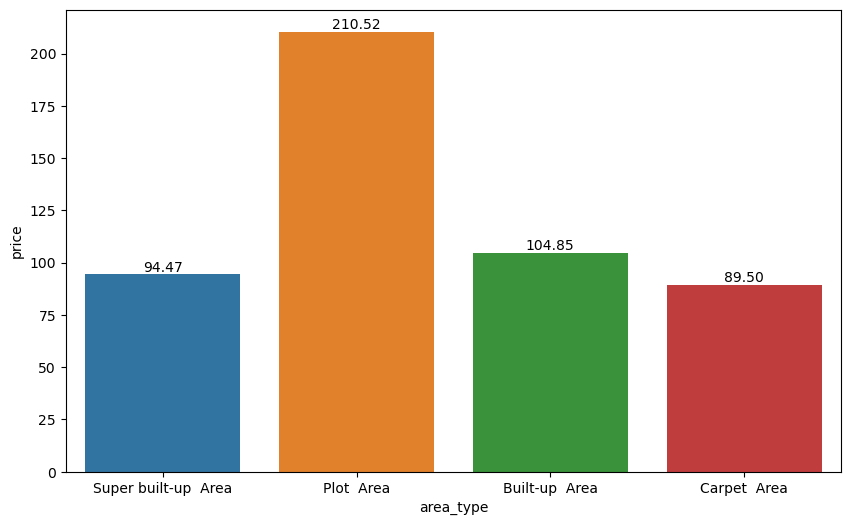

In [112]:
plt.figure(figsize = (10,6), dpi = 100)
ax = sns.barplot(x  = "area_type", y = "price", data = df, ci = False)
for i in ax.containers:
    ax.bar_label(i, fmt = "%.2f")
    
plt.show()

__Observation:__

- plot are will have the average price as 146.39, which is far greater than the rst of the three

#### Relationship between price and total_sqft

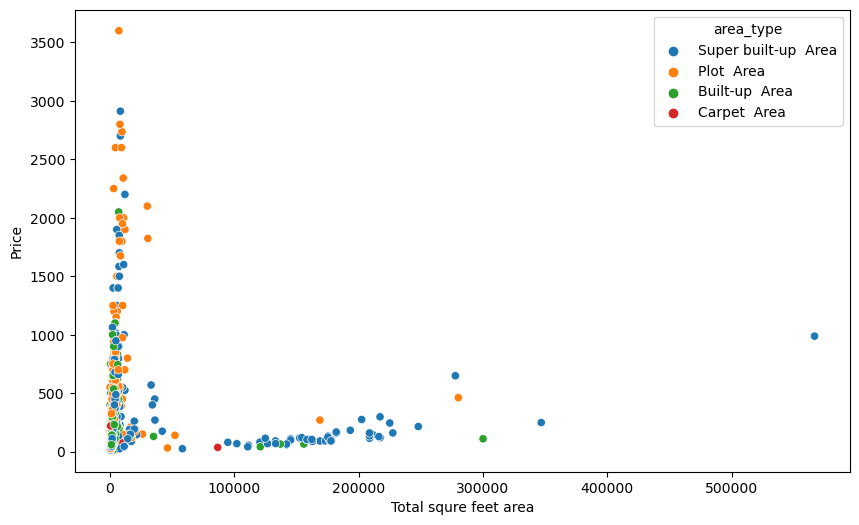

In [119]:
plt.figure(figsize = (10,6), dpi = 100)
sns.scatterplot(x = "total_sqft", y = "price",hue = "area_type" ,data = df)
plt.xlabel("Total squre feet area")
plt.ylabel("Price")
plt.show()

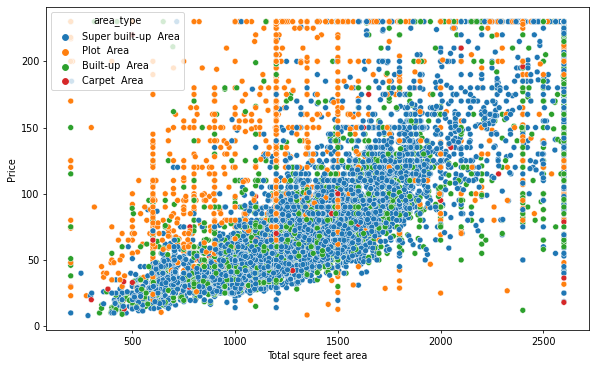

In [125]:
plt.figure(figsize = (10,6), dpi =70)
sns.scatterplot(x = "Total", y = "New_price",hue = "area_type" ,data = df)
plt.xlabel("Total squre feet area")
plt.ylabel("Price")
plt.show()

__Observation:__
    
- We can clearly see the linear relationship between the price and the total squre feet area 

### Observation according to the area _type

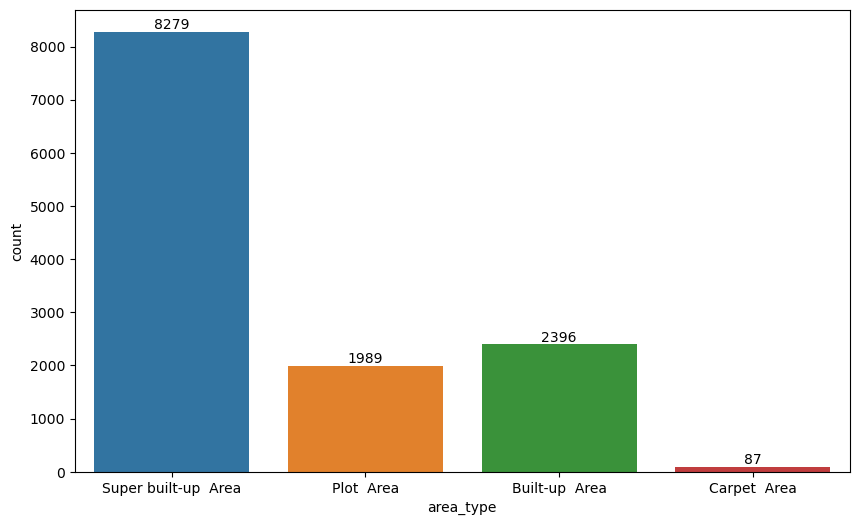

In [127]:
plt.figure(figsize = (10,6), dpi = 100)

ax = sns.countplot(x = "area_type", data = df)

for i in ax.containers:
    ax.bar_label(i)

__Observation:__
    
- 8279 properties are out superbuilt-up area which is the largest among others while oly carpet area has only 87 properties which is smallest amomg all

### Ratio of the area-type

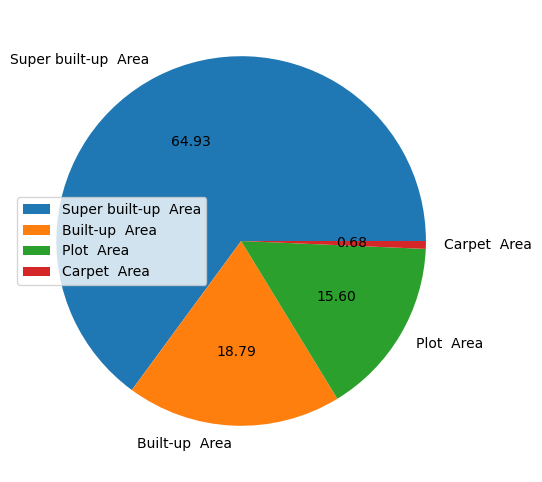

In [128]:
plt.figure(figsize = (10,6), dpi = 100)

plt.pie(df.area_type.value_counts(), labels = df.area_type.value_counts().index, autopct="%.2f")
plt.legend()
plt.show()

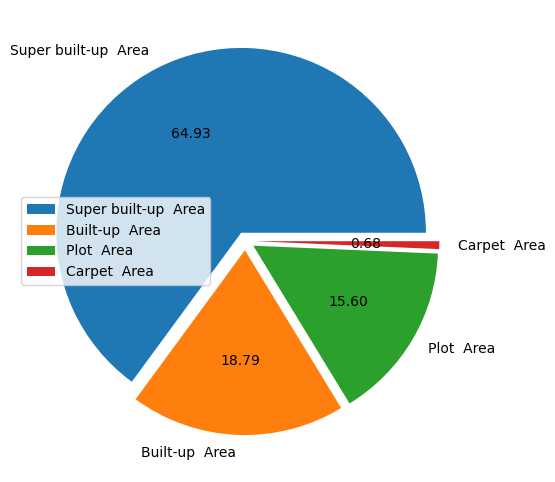

In [132]:
plt.figure(figsize = (10,6), dpi = 100)

plt.pie(df.area_type.value_counts(), labels = df.area_type.value_counts().index, autopct="%.2f", explode= (0.05,0.05,0.05,0.05))
plt.legend()
plt.show()

In [133]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total,New_price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,2600.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0,51.00


In [134]:
df["size"].value_counts()

size
2 BHK         4919
3 BHK         4108
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

### Average price of 2BHK, 3BHK, 4BHK

In [137]:
x = df[(df["size"]== "2 BHK") | (df["size"]== "3 BHK")|(df["size"]== "4 BHK")]

In [138]:
x

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total,New_price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0,39.07
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,1170.0,38.00
...,...,...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,1262.0,2.0,2.0,47.00,1262.0,47.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,1715.0,112.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600.0,5.0,2.0,400.00,2600.0,230.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,1141.0,60.00


C:\Users\bobby\AppData\Local\Temp\ipykernel_22880\4076833046.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x = "size", y = "price", data = x, ci = False)


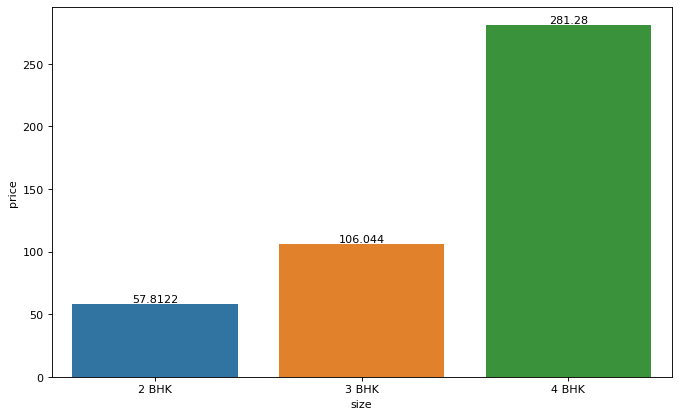

In [139]:
plt.figure(figsize = (10,6), dpi = 80)

ax = sns.barplot(x = "size", y = "price", data = x, ci = False)

for i in ax.containers:
    ax.bar_label(i)

__Observation:__
    
- The avarage price for 4 BHK is 2cr 81 lakh 
- The avarage price for 3 BHK is 1cr 6 lakh
- The avarage price for 2 BHK is 57 lakh

### Maximum price for a 2BHK, 3BHK, 4BHK

C:\Users\bobby\AppData\Local\Temp\ipykernel_22880\2893111954.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x = "size", y = "price", data = x, ci = False, estimator=np.max)


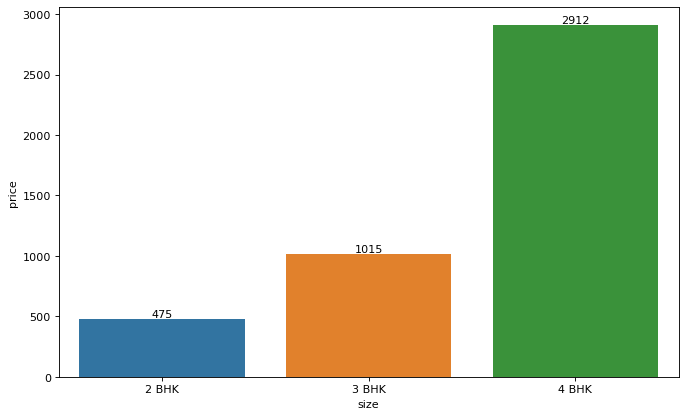

In [140]:
plt.figure(figsize = (10,6), dpi = 80)

ax = sns.barplot(x = "size", y = "price", data = x, ci = False, estimator=np.max)

for i in ax.containers:
    ax.bar_label(i)

### Minimun price for a 2BHK, 3BHK, 4BHK

C:\Users\bobby\AppData\Local\Temp\ipykernel_22880\2560888250.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x = "size", y = "price", data = x, ci = False, estimator=np.min)


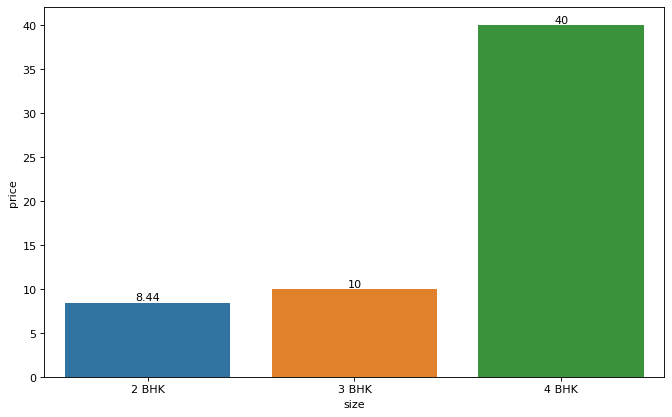

In [141]:
plt.figure(figsize = (10,6), dpi = 80)

ax = sns.barplot(x = "size", y = "price", data = x, ci = False, estimator=np.min)

for i in ax.containers:
    ax.bar_label(i)

### Correlation

<Axes: >

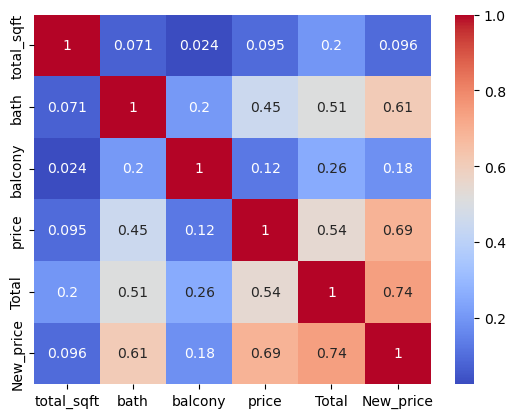

In [143]:
corr_mat = df.corr(numeric_only=  True)
sns.heatmap(corr_mat,annot= True,cmap = "coolwarm" )

In [149]:
a = df.corr(method='spearman', min_periods=1, numeric_only=True)
a

,total_sqft,bath,balcony,price,Total,New_price
total_sqft,1.000000,0.627980,0.309577,0.726219,0.999562,0.724666
bath,0.627980,1.000000,0.301474,0.711496,0.628808,0.711120
balcony,0.309577,0.301474,1.000000,0.223604,0.309888,0.223571
price,0.726219,0.711496,0.223604,1.000000,0.726745,0.999528
Total,0.999562,0.628808,0.309888,0.726745,1.000000,0.725399
New_price,0.724666,0.711120,0.223571,0.999528,0.725399,1.000000


<Axes: >

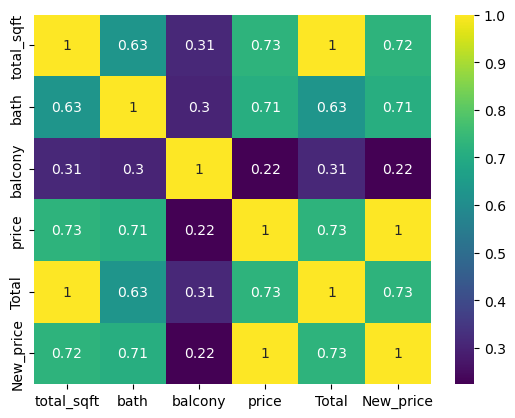

In [150]:
sns.heatmap(a, annot=True, cmap="viridis")

__Observation:__

- The "total_sqft" has a strong positive correlation with the "price" (0.726), indicating that as the total square footage increases, the price also tends to increase.
- The number of "bathrooms" also has a relatively strong positive correlation with the "price" (0.711), suggesting that a higher number of bathrooms is associated with a higher price.
- The "total_sqft" and "New_price" are almost perfectly positively correlated (0.999), which is expected as "New_price" is derived from "total_sqft" and "price."
- Similarly, "price" and "New_price" are also almost perfectly positively correlated (0.999), which is expected as "New_price" is derived from "price."